# 1. Importing Data

In [1]:
# loading data 
import kagglehub

# Download latest version
path = kagglehub.dataset_download("umuttuygurr/e-commerce-customer-behavior-and-sales-analysis-tr")

print("Path to dataset files:", path)
print("Data Successifully Loaded")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/josemosse/.cache/kagglehub/datasets/umuttuygurr/e-commerce-customer-behavior-and-sales-analysis-tr/versions/2
Data Successifully Loaded


In [2]:
# importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import streamlit as st 
import matplotlib.pyplot as plt 
import glob
from datetime import datetime


In [3]:
# Accessing the data 
files = glob.glob('/Users/josemosse/.cache/kagglehub/datasets/umuttuygurr/e-commerce-customer-behavior-and-sales-analysis-tr/versions/2/*.csv')
df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
df.to_csv('Students_Academic_Performance', index=False)

print('Data accessed successfully', files)
df.head(15)

Data accessed successfully ['/Users/josemosse/.cache/kagglehub/datasets/umuttuygurr/e-commerce-customer-behavior-and-sales-analysis-tr/versions/2/ecommerce_customer_behavior_dataset_v2.csv', '/Users/josemosse/.cache/kagglehub/datasets/umuttuygurr/e-commerce-customer-behavior-and-sales-analysis-tr/versions/2/ecommerce_customer_behavior_dataset.csv']


,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_000001-1,CUST_00001,2023-05-29,40,Male,Ankara,Books,29.18,1,0.00,29.18,Digital Wallet,Mobile,14,9,True,13,4
1,ORD_000001-2,CUST_00001,2023-10-12,40,Male,Ankara,Home & Garden,644.40,1,138.05,506.35,Credit Card,Desktop,14,8,True,6,2
2,ORD_000001-3,CUST_00001,2023-12-05,40,Male,Ankara,Sports,332.82,5,0.00,1664.10,Credit Card,Mobile,15,10,True,9,4
3,ORD_000002-1,CUST_00002,2023-05-11,33,Male,Istanbul,Food,69.30,5,71.05,275.45,Digital Wallet,Desktop,16,13,True,4,4
4,ORD_000002-2,CUST_00002,2023-06-16,33,Male,Istanbul,Beauty,178.15,3,0.00,534.45,Credit Card,Mobile,14,7,True,6,4
5,ORD_000003-1,CUST_00003,2023-02-27,42,Male,Konya,Toys,198.28,2,0.00,396.56,Credit Card,Tablet,10,9,False,6,2
6,ORD_000003-2,CUST_00003,2024-01-03,42,Male,Konya,Home & Garden,526.85,5,0.00,2634.25,Digital Wallet,Desktop,11,8,True,6,5
7,ORD_000004-1,CUST_00004,2024-02-13,53,Male,Izmir,Fashion,96.20,5,97.78,383.22,Credit Card,Desktop,16,15,False,4,5
8,ORD_000005-1,CUST_00005,2023-03-16,32,Male,Ankara,Home & Garden,533.67,3,0.00,1601.01,Bank Transfer,Mobile,12,8,False,5,5
9,ORD_000005-2,CUST_00005,2023-06-12,32,Male,Ankara,Toys,73.06,4,0.00,292.24,Credit Card,Mobile,13,12,True,7,2


# 2. Checking Data Quality

In [4]:
# Data info
df.info()

# Lookig for missing values
missing_v = df.isnull().sum()
if missing_v.sum() == 0:
    print('No missing values found')
else:
    print(missing_v [missing_v > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22049 entries, 0 to 22048
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  22049 non-null  object 
 1   Customer_ID               22049 non-null  object 
 2   Date                      22049 non-null  object 
 3   Age                       22049 non-null  int64  
 4   Gender                    22049 non-null  object 
 5   City                      22049 non-null  object 
 6   Product_Category          22049 non-null  object 
 7   Unit_Price                22049 non-null  float64
 8   Quantity                  22049 non-null  int64  
 9   Discount_Amount           22049 non-null  float64
 10  Total_Amount              22049 non-null  float64
 11  Payment_Method            22049 non-null  object 
 12  Device_Type               22049 non-null  object 
 13  Session_Duration_Minutes  22049 non-null  int64  
 14  Pages_

In [5]:
# Statistical summary 
df.describe()

,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating
count,22049.000000,22049.000000,22049.000000,22049.000000,22049.000000,22049.000000,22049.000000,22049.000000,22049.000000
mean,34.965441,449.700508,2.831920,59.598256,1210.694234,14.544197,8.998821,6.502109,3.900177
std,11.054313,720.091114,1.451207,216.621317,2265.755590,4.862567,2.394224,3.483322,1.128719
min,18.000000,5.050000,1.000000,0.000000,6.210000,1.000000,1.000000,1.000000,1.000000
25%,27.000000,74.050000,1.000000,0.000000,159.800000,12.000000,7.000000,4.000000,3.000000
50%,35.000000,177.110000,3.000000,0.000000,429.920000,14.000000,9.000000,6.000000,4.000000
75%,42.000000,499.360000,4.000000,25.080000,1199.060000,17.000000,11.000000,8.000000,5.000000
max,75.000000,7900.010000,5.000000,6538.290000,37852.050000,73.000000,24.000000,25.000000,5.000000


In [6]:
# Checking all distinct values
for col in df:
    print(col)
    print(df[col].unique())
    print('-'*110)

Order_ID
['ORD_000001-1' 'ORD_000001-2' 'ORD_000001-3' ... 'ORD_003543'
 'ORD_004443' 'ORD_000902']
--------------------------------------------------------------------------------------------------------------
Customer_ID
['CUST_00001' 'CUST_00002' 'CUST_00003' ... 'CUST_04998' 'CUST_04999'
 'CUST_05000']
--------------------------------------------------------------------------------------------------------------
Date
['2023-05-29' '2023-10-12' '2023-12-05' '2023-05-11' '2023-06-16'
 '2023-02-27' '2024-01-03' '2024-02-13' '2023-03-16' '2023-06-12'
 '2023-06-21' '2023-07-24' '2023-08-07' '2023-08-27' '2024-01-05'
 '2023-09-14' '2023-10-07' '2023-10-09' '2024-02-16' '2023-08-15'
 '2023-12-17' '2024-03-04' '2023-04-08' '2023-05-23' '2023-11-05'
 '2023-12-11' '2023-12-14' '2024-01-13' '2024-03-14' '2024-02-02'
 '2023-02-09' '2024-02-25' '2023-01-22' '2023-09-28' '2023-10-08'
 '2023-02-13' '2023-05-15' '2023-08-20' '2023-10-15' '2023-01-23'
 '2023-04-17' '2023-07-07' '2023-07-13' '2023-08

# 3. Analysing Features 

In [7]:
# Converting data into date time format
df['Date'] = pd.to_datetime(df['Date'])

# Analysing the Financial Features
df['Total_Amount'] = df['Unit_Price'] * df['Quantity']
df['Final_Amount'] = df['Total_Amount'] - df['Discount_Amount']
df['Discount_Percentage'] = (df['Discount_Amount'] / df['Total_Amount'] * 100).fillna(0)

# Checking what products made most profit
Salesby_cate = df.groupby("Product_Category")["Total_Amount"].sum().sort_values(ascending=False)
print(Salesby_cate)

Product_Category
Electronics      13441077.19
Home & Garden     5180862.25
Sports            4155234.00
Fashion           2043658.12
Toys              1296142.22
Beauty             894074.59
Food               544404.85
Books              453225.88
Name: Total_Amount, dtype: float64


In [8]:
# Time Features
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month_name()
df["Day"] = df["Date"].dt.day

In [9]:
# Checking discount amount on products 
disc_by_device=df.groupby("Device_Type")["Discount_Amount"].sum().sort_values(ascending=False)
print(disc_by_device)

Device_Type
Mobile     740398.51
Desktop    445420.42
Tablet     128263.01
Name: Discount_Amount, dtype: float64


# 4. Graphical Analysis

/var/folders/v4/zn4zqr5n3v933txy2dt3rv700000gp/T/ipykernel_28579/557366663.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Salesby_cate.index,y=Salesby_cate,palette="magma")


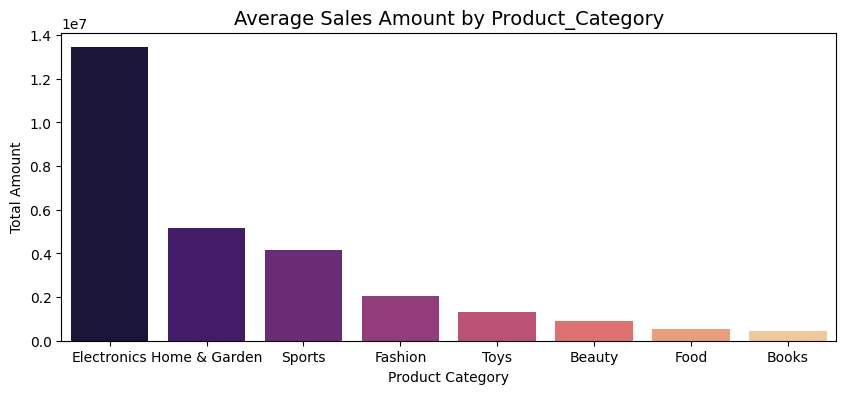

In [10]:
# Visualizing Sales amount
plt.figure(figsize=(10,4))
sns.barplot(x=Salesby_cate.index,y=Salesby_cate,palette="magma")
plt.title("Average Sales Amount by Product_Category", fontsize=14)
plt.xlabel("Product Category")
plt.ylabel("Total Amount")
plt.show()

/var/folders/v4/zn4zqr5n3v933txy2dt3rv700000gp/T/ipykernel_28579/3762795876.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disc_by_device.index,y=disc_by_device, palette="cividis")


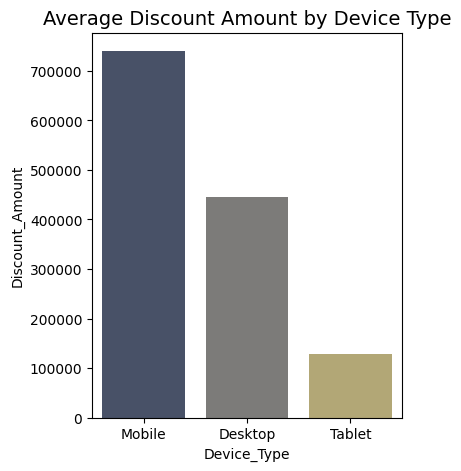

In [11]:
# Visualizing the discount amount 
plt.figure(figsize=(4,5))
sns.barplot(x=disc_by_device.index,y=disc_by_device, palette="cividis")
plt.title("Average Discount Amount by Device Type", fontsize=14)
plt.xlabel=("Discount Type")
plt.ylabel=("Sum Dicount")
plt.show()

/var/folders/v4/zn4zqr5n3v933txy2dt3rv700000gp/T/ipykernel_28579/2651154988.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_city.index,y=sales_by_city,palette="rainbow")


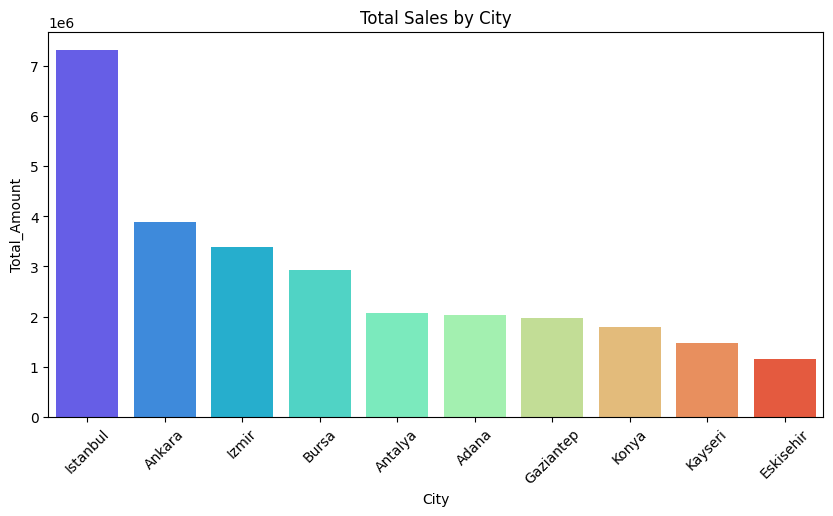

In [12]:
# Visualizing sales by different cities 
sales_by_city=df.groupby("City")["Total_Amount"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=sales_by_city.index,y=sales_by_city,palette="rainbow")
plt.title("Total Sales by City")
plt.xticks(rotation=45)
plt.show()



/var/folders/v4/zn4zqr5n3v933txy2dt3rv700000gp/T/ipykernel_28579/1809105503.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x ="Payment_Method", palette='Pastel1')


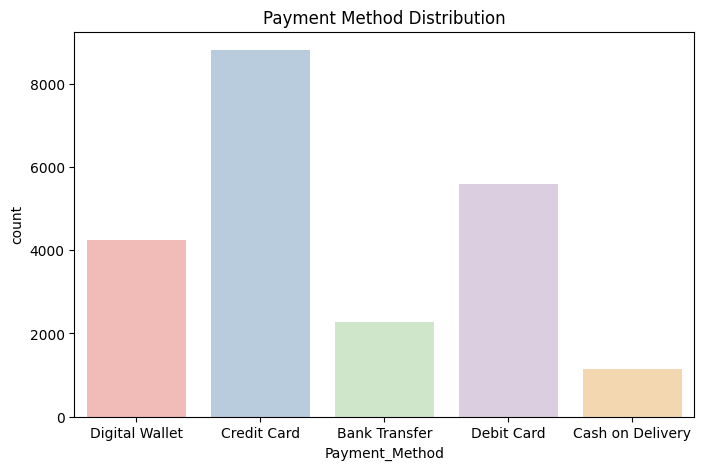

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(data = df, x ="Payment_Method", palette='Pastel1')
plt.title("Payment Method Distribution")
plt.show()

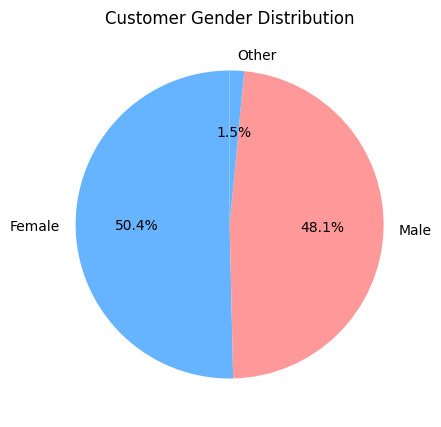

In [14]:


plt.figure(figsize=(5,5))
df["Gender"].value_counts().plot.pie(autopct='%1.1f%%', colors=["#66b3ff","#ff9999"], startangle=90)
plt.title("Customer Gender Distribution")
plt.gca().set_ylabel("")
plt.show()

